<a href="https://colab.research.google.com/github/wdchen2000/libgtop2.2/blob/master/PyTorch_Receipe_1_Loading_data_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This example is from https://pytorch.org/tutorials/recipes/recipes/loading_data_recipe.html

It is working - after fixing several bugs


In [3]:
!pip3 install torch
!pip install torchaudio

     |████████████████████████████████| 3.2MB 2.9MB/s 
     |████████████████████████████████| 753.2MB 21kB/s 
ERROR: torchvision 0.6.0+cu101 has requirement torch==1.5.0, but you'll have torch 1.5.1 which is incompatible.
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101


In [12]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6fcdc2b42622ac0b20899defe6f609aae7d8108a3845f9841c0ee17e9e42dbe6
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [16]:
import torch
import torchaudio
import wget
import os

In [22]:
root = os. getcwd()
print(" root = ",root)
url = 'http://www.openslr.org/resources/1/waves_yesno.tar.gz'
filename = wget.download(url)
print (filename)
arr = os.listdir('.')
print ("listdir=",arr)

 root =  /content
waves_yesno.tar (5).gz
listdir= ['.config', 'waves_yesno.tar (5).gz', 'waves_yesno.tar.gz', 'waves_yesno.tar (4).gz', 'waves_yesno.tar (2).gz', 'waves_yesno.tar (1).gz', 'waves_yesno.tar (3).gz', 'sample_data']


In [25]:
url = 'http://www.openslr.org/resources/1/waves_yesno.tar.gz'
filename = wget.download(url)
print (filename)
torchaudio.datasets.YESNO(
  root,
  url='http://www.openslr.org/resources/1/waves_yesno.tar.gz',
  folder_in_archive='waves_yesno',
  download=True,
  transform=None,
  target_transform=None)

waves_yesno.tar (8).gz


In [28]:
 yesno_data_trainset = torchaudio.datasets.YESNO('./', download=True)
# Pick data point number 3 to see an example of the the yesno_data:
n = 3
# wdchen - modified the following line
waveform, sample_rate, labels = yesno_data_trainset[n]
print("Waveform: {}\nSample rate: {}\nLabels: {}".format(waveform, sample_rate, labels))

Waveform: tensor([[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -1.5259e-03,
         -2.5024e-03, -1.6479e-03]])
Sample rate: 8000
Labels: [0, 1, 0, 0, 0, 1, 1, 0]


In [29]:
data_loader = torch.utils.data.DataLoader(yesno_data_trainset,
                                          batch_size=1,
                                          shuffle=True)
for data in data_loader:
  print("Data: ", data)
  print("Waveform: {}\nSample rate: {}\nLabels: {}".format(data[0], data[1], data[2]))
  break


Data:  [tensor([[[ 0.0003,  0.0003,  0.0003,  ..., -0.0041, -0.0042, -0.0031]]]), tensor([8000]), [tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([0])]]
Waveform: tensor([[[ 0.0003,  0.0003,  0.0003,  ..., -0.0041, -0.0042, -0.0031]]])
Sample rate: tensor([8000])
Labels: [tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([0])]


[[ 0.00030518  0.00033569  0.00030518 ... -0.00408936 -0.00415039
  -0.00308228]]


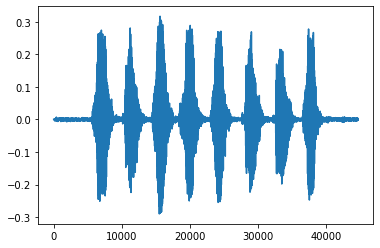

In [30]:
import matplotlib.pyplot as plt
print(data[0][0].numpy())
plt.figure()
plt.plot(waveform.t().numpy())
